In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


[*********************100%%**********************]  1 of 1 completed


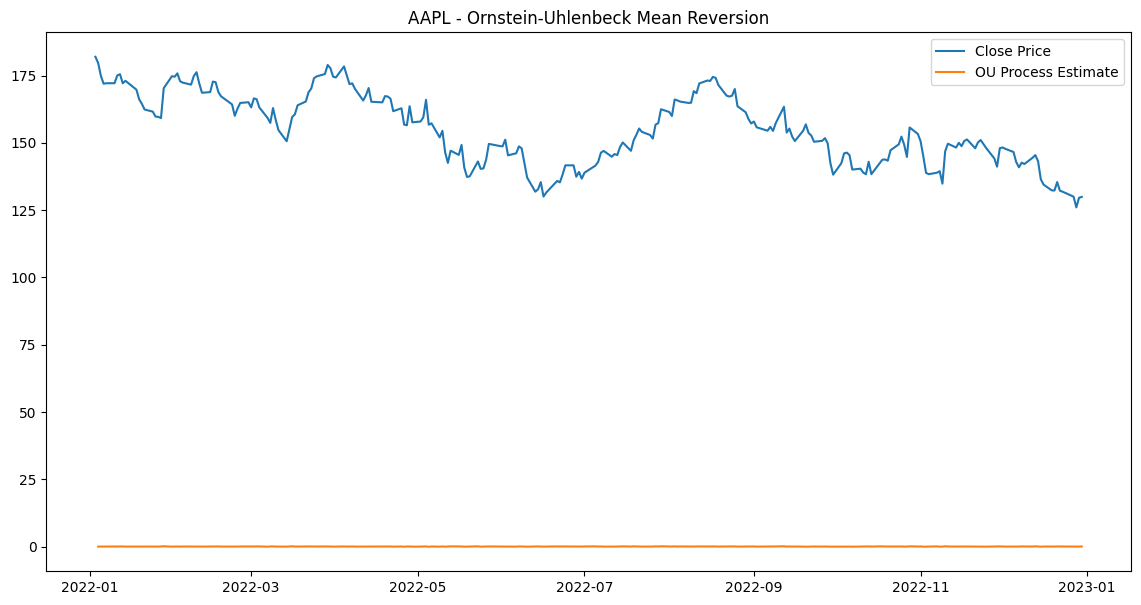

In [2]:

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Fit Ornstein-Uhlenbeck process
def ou_process(data):
    mu = np.mean(data)
    sigma = np.std(data)
    theta = 1 / len(data)
    return mu, theta, sigma

# Apply OU process
mu, theta, sigma = ou_process(data['Returns'].dropna())

# Simulate the OU process
data['OU'] = mu + (data['Returns'] - mu) * np.exp(-theta) + sigma * np.random.normal(size=len(data))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['OU'], label='OU Process Estimate')
plt.title(f'{symbol} - Ornstein-Uhlenbeck Mean Reversion')
plt.legend()
plt.show()


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Fit Ornstein-Uhlenbeck process
def ou_process(data):
    mu = np.mean(data)
    sigma = np.std(data)
    theta = 1 / len(data)
    return mu, theta, sigma

# Apply OU process
mu, theta, sigma = ou_process(data['Returns'].dropna())

# Simulate the OU process
data['OU'] = mu + (data['Returns'] - mu) * np.exp(-theta) + sigma * np.random.normal(size=len(data))

# Generate trading signals
data['Signal'] = 0
data['Signal'][1:] = np.where(data['Close'][1:] > data['OU'][:-1], -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - Ornstein-Uhlenbeck Mean Reversion with Backtesting')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


ValueError: Can only compare identically-labeled Series objects

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Fit Ornstein-Uhlenbeck process
def ou_process(data):
    mu = np.mean(data)
    sigma = np.std(data)
    theta = 1 / len(data)
    return mu, theta, sigma

# Apply OU process
mu, theta, sigma = ou_process(data['Returns'].dropna())

# Simulate the OU process
ou_values = mu + (data['Returns'] - mu) * np.exp(-theta) + sigma * np.random.normal(size=len(data))

# Ensure the OU process has the same index as the original data
data['OU'] = pd.Series(ou_values, index=data.index[1:])

# Generate trading signals
data['Signal'] = 0
data['Signal'][1:] = np.where(data['Close'].iloc[1:].values > data['OU'].values, -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - Ornstein-Uhlenbeck Mean Reversion with Backtesting')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


ValueError: operands could not be broadcast together with shapes (250,) (251,) 

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Fit Ornstein-Uhlenbeck process
def ou_process(data):
    mu = np.mean(data)
    sigma = np.std(data)
    theta = 1 / len(data)
    return mu, theta, sigma

# Apply OU process
mu, theta, sigma = ou_process(data['Returns'].dropna())

# Simulate the OU process
ou_values = mu + (data['Returns'] - mu) * np.exp(-theta) + sigma * np.random.normal(size=len(data))

# Ensure the OU process has the same index as the original data
ou_series = pd.Series(ou_values, index=data.index[1:])

# Generate trading signals
data['OU'] = ou_series
data['Signal'] = 0
data['Signal'].iloc[1:] = np.where(data['Close'].iloc[1:] > data['OU'].values, -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - Ornstein-Uhlenbeck Mean Reversion with Backtesting')
plt.legend()
plt.show()



[*********************100%%**********************]  1 of 1 completed


ValueError: ('Lengths must match to compare', (250,), (251,))

[*********************100%%**********************]  1 of 1 completed
C:\Users\ayman\AppData\Local\Temp\ipykernel_10204\3621306873.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][1:] = np.where(data['Close'][1:].values > d

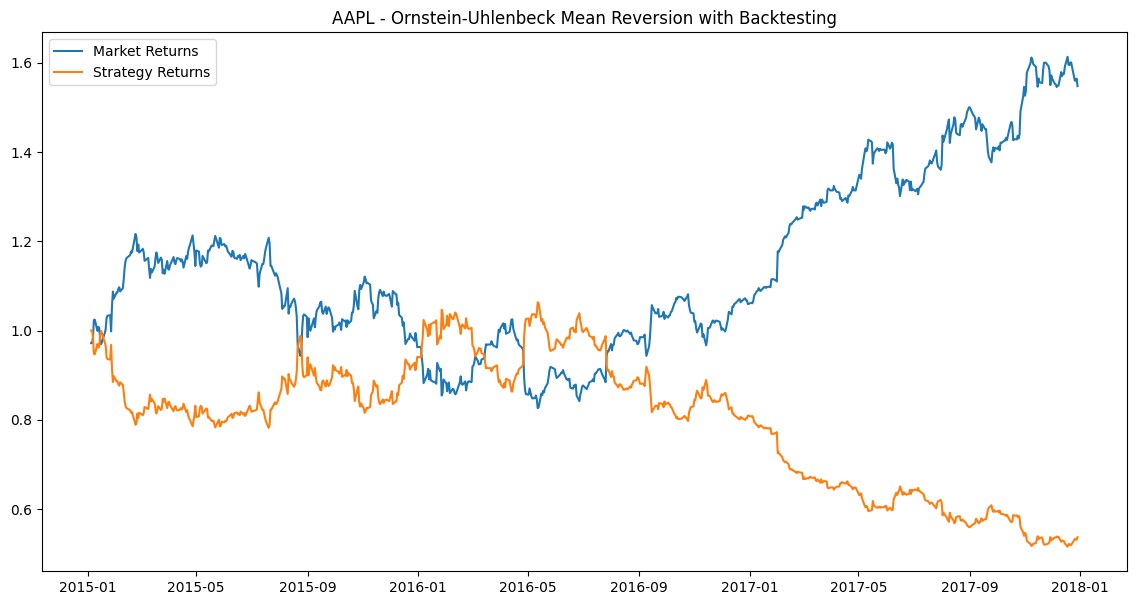

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data
symbol = 'AAPL'
data = yf.download(symbol, start='2015-01-01', end='2018-01-01')

# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Fit Ornstein-Uhlenbeck process
def ou_process(data):
    mu = np.mean(data)
    sigma = np.std(data)
    theta = 1 / len(data)
    return mu, theta, sigma

# Apply OU process
mu, theta, sigma = ou_process(data['Returns'].dropna())

# Simulate the OU process
ou_values = mu + (data['Returns'].values - mu) * np.exp(-theta) + sigma * np.random.normal(size=len(data))

# Ensure the OU process has the same index as the original data
ou_series = pd.Series(ou_values, index=data.index)

# Align OU series length with Close prices
ou_series = ou_series.reindex(data.index, method='bfill')

# Generate trading signals
data['OU'] = ou_series
data['Signal'] = 0
data['Signal'][1:] = np.where(data['Close'][1:].values > data['OU'][1:].values, -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'{symbol} - Ornstein-Uhlenbeck Mean Reversion with Backtesting')
plt.legend()
plt.show()
